# ENISA vulnerabilities 2018 report
## 13. Exploit prices

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utility as util
import plotly.figure_factory as ff

## 13.1. Bug bounty

The following analysis is performed on [Zerodium's](https://zerodium.com/) bug bounty programme dataset.

In [2]:
df=pd.read_csv('../data/market/prices.csv')
df_type=df.copy()
df.head()

,source,product,system,type,severity,price Up to
0,zerodium.com,Android,Android,"FCP, Zero Click",NaN,"2,500,000"
1,zerodium.com,iOS,iOS,"FCP, Zero Click",NaN,"2,000,000"
2,zerodium.com,WhatsApp,"iOS, Android","RCE, LPE, Zero Click",NaN,"1,500,000"
3,zerodium.com,iMessage,iOS,"RCE, LPE, Zero Click",NaN,"1,500,000"
4,zerodium.com,WhatsApp,"iOS, Android","RCE, LPE",NaN,"1,000,000"


In [3]:
# explode system column into rows with individual systems and convert price string to number (stored in a new column)
df['system']=df.system.str.replace('Any' , 'iOS, Android, Windows, macOS, Linux, Chrome OS')
df_system=util.tidy_split(df, column='system', sep=',')
df_system.system=df_system.system.str.strip()
df_system['price Up to2']=df_system['price Up to'].str.replace(',','').astype(float)

Android      50
iOS          49
Linux        48
Windows      42
macOS        26
Chrome OS    25
Intel        12
Name: system, dtype: int64


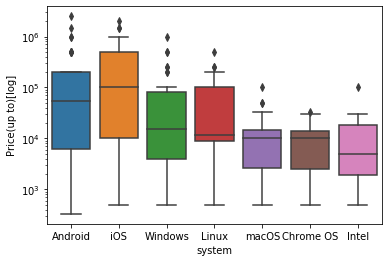

In [4]:
g=sns.boxplot(y='price Up to2',x='system',data=df_system)
g.set_yscale("log")
g.set_xlabel('system')
g.set_ylabel('Price(up to)[log]')

print(df_system['system'].value_counts())

RCE                      58
LPE                      26
Bypass                    6
Zero Click                5
SBX                       3
CSRF                      3
XSS                       3
FCP                       2
VME                       2
RCE via MitM              2
Code Signing Bypass       2
LPE/SBX                   2
Persistence               2
Sandbox Escape            1
SQLi                      1
Authentication Bypass     1
SQL Injection             1
Name: type, dtype: int64


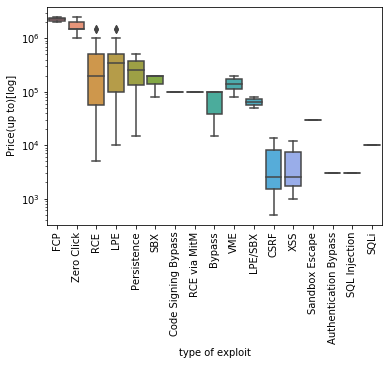

In [5]:
# do the same for "type"
df_type=util.tidy_split(df, column='type', sep=',')
df_type.type=df_type.type.str.strip()
df_type['price Up to2']=df_type['price Up to'].str.replace(',','').astype(float)

g=sns.boxplot(y='price Up to2',x='type',data=df_type)
plt.setp(g.get_xticklabels(), rotation=90)
g.set_yscale("log")
g.set_xlabel('type of exploit')
g.set_ylabel('Price(up to)[log]')

print(df_type['type'].value_counts())


In [6]:
# Look into a particular type, e.g.:

df_type[df_type.type=='Bypass']


,source,product,system,type,severity,price Up to,price Up to2
30,zerodium.com,[k]ASLR,"iOS, Android",Bypass,NaN,"100,000",100000.0
31,zerodium.com,PIN,Android,Bypass,NaN,"100,000",100000.0
32,zerodium.com,Passcode,iOS,Bypass,NaN,"100,000",100000.0
33,zerodium.com,TouchID,iOS,Bypass,NaN,"100,000",100000.0
95,hackerone.com/dropbox,Dropbox Authentication,"iOS, Android, Windows, macOS, Linux, Chrome OS",Bypass,NaN,"17,576",17576.0
100,google.com/about/appsecurity/chrome-rewards/,Lockscreen,Chrome OS,Bypass,NaN,"15,000",15000.0


___

## 13.2. Price estimates

The following analysis is based on [VulDB's](https://vuldb.com/) data who employ a proprietary exploit price estimation



In [7]:
data=pd.read_csv('../data/all.csv', low_memory=False)



### Comparison of average CVSS v3 base scores against prices

Text(0.5, 0, 'CVSS v3 base score')

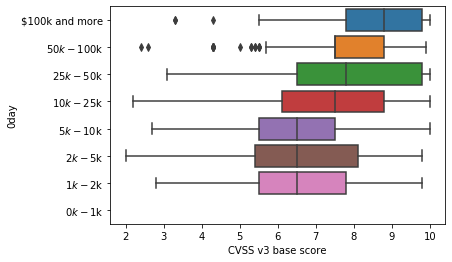

In [8]:
sns.boxplot(x='cvss3_bscore',y='0day',data=data,order=['$100k and more','$50k-$100k','$25k-$50k','$10k-$25k','$5k-$10k','$2k-$5k','$1k-$2k','$0k-$1k'])
plt.xlabel('CVSS v3 base score')

Text(0.5, 0, 'CVSS v3 base score')

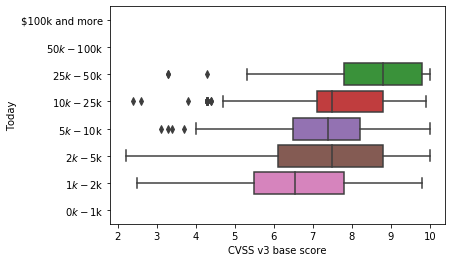

In [9]:
sns.boxplot(x='cvss3_bscore',y='Today',data=data,order=['$100k and more','$50k-$100k','$25k-$50k','$10k-$25k','$5k-$10k','$2k-$5k','$1k-$2k','$0k-$1k'])
plt.xlabel('CVSS v3 base score')

### Hierarchical clustering on prices over software types

In [12]:
# Calculations for the cluster

grouped1=data[data.cvss3_bscore>=7].groupby('Type')
top=grouped1.filter(lambda x: x['Type'].count() > 40).groupby('Type').count()['id'].sort_values(ascending=False)
other=grouped1.filter(lambda x: x['Type'].count() <= 40).groupby('Type').count()['id'].sort_values(ascending=False)
testxx=data[data.Type.isin(top.index)].groupby('Type').mean().reset_index()
datah = testxx[['0day_low_y','Today_low','Today_upper']].values
labelsh=list(testxx.Type.values)

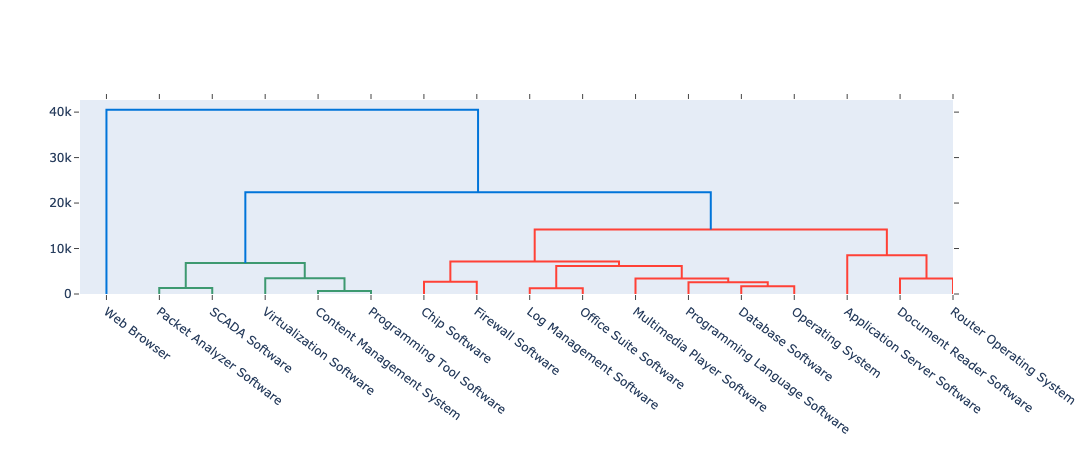

In [13]:
# Creating the dendrogram output

fig = ff.create_dendrogram(datah, labels=labelsh, color_threshold=20000)
fig.update_layout(xaxis_tickangle=37)
fig.show()